In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/hp/Desktop/TMR-EDA/Code/10_01_2023/data_for_10_01_2023/final_encoded_data_with_d1_d2_d3.csv')

In [3]:
df.head(2)

,RFP % Present,RFP Last Status,RFP Last Internal Rating,RFP Last TRACK Score,RFP Tech Ability,RFP Learnability,Last Graduation,RFP Communicability,RFP Avg TRACK Score,TechCategory,Trial Avg TRACK Score,Trial Communicability Score,Trial Last Internal Rating,Trial Learnability Score,Trial Techability Score,Trial % Present,Year,Practice Head
0,76.0,2,3,3.32,1.68,1.72,4,0.86,4.26,2,3.69,0.59,0,1.475,1.625,100.0,2019.0,4
1,89.0,0,2,3.60,1.22,1.51,3,0.67,3.40,0,3.23,0.62,3,1.050,1.560,100.0,2020.0,1


In [4]:
df.loc[df["TechCategory"] == 0, "TechCategory"] = "AdvTech_1_2"
df.loc[df["TechCategory"] == 2, "TechCategory"] = "FullStack_DeepTech"
df.loc[df["TechCategory"] == 1, "TechCategory"] = "BasicTech"
df.loc[df["TechCategory"] == 3, "TechCategory"] = "StdTech"

In [5]:
df.head(2)

,RFP % Present,RFP Last Status,RFP Last Internal Rating,RFP Last TRACK Score,RFP Tech Ability,RFP Learnability,Last Graduation,RFP Communicability,RFP Avg TRACK Score,TechCategory,Trial Avg TRACK Score,Trial Communicability Score,Trial Last Internal Rating,Trial Learnability Score,Trial Techability Score,Trial % Present,Year,Practice Head
0,76.0,2,3,3.32,1.68,1.72,4,0.86,4.26,FullStack_DeepTech,3.69,0.59,0,1.475,1.625,100.0,2019.0,4
1,89.0,0,2,3.60,1.22,1.51,3,0.67,3.40,AdvTech_1_2,3.23,0.62,3,1.050,1.560,100.0,2020.0,1


In [6]:
df_1 = df.drop('TechCategory', axis=1)

In [7]:
df_1.head(2)

,RFP % Present,RFP Last Status,RFP Last Internal Rating,RFP Last TRACK Score,RFP Tech Ability,RFP Learnability,Last Graduation,RFP Communicability,RFP Avg TRACK Score,Trial Avg TRACK Score,Trial Communicability Score,Trial Last Internal Rating,Trial Learnability Score,Trial Techability Score,Trial % Present,Year,Practice Head
0,76.0,2,3,3.32,1.68,1.72,4,0.86,4.26,3.69,0.59,0,1.475,1.625,100.0,2019.0,4
1,89.0,0,2,3.60,1.22,1.51,3,0.67,3.40,3.23,0.62,3,1.050,1.560,100.0,2020.0,1


In [8]:
m = TSNE(learning_rate=50)

In [9]:
tsne_features = m.fit_transform(df_1)
tsne_features[1:4,:]

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[  1.7976226, -20.310158 ],
       [ 11.499705 ,  17.02919  ],
       [ -8.643046 ,  25.003239 ]], dtype=float32)

In [10]:
df['x'] = tsne_features[:,0] 
df['y'] = tsne_features[:,1] 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

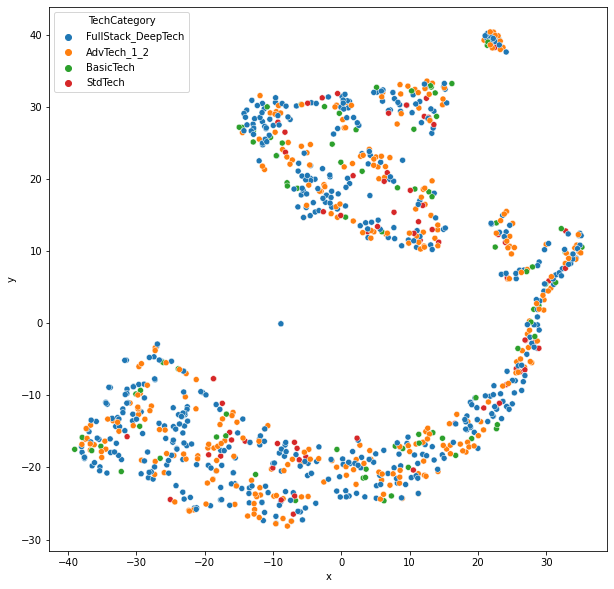

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='x',y='y',hue='TechCategory',data=df)
plt.show()